In [1]:
!pip install fasteda

  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4739 sha256=3194f7200d07a2a91a3f9105c9e4a104e06c9804c093131a7849b88c23eaa569
  Stored in directory: c:\users\2211592\appdata\local\pip\cache\wheels\93\57\7e\fdc4b9923cf3f1f46de4e2ea7a5a4acb335357f919920ffb7c
Successfully built fasteda


# About The Dataset: 

### This dataset can be used to predict the presence of kidney stones based on urine analysis.

**The 79 urine specimens, were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.**

**The six physical characteristics of the urine are:**
1. Specific Gravity: the density of the urine relative to water; 
2. pH: the negative logarithm of the hydrogen ion; 
3. osmolarity (mOsm): a unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution; 
4. Conductivity (mMho milliMho): Conductivity is proportional to the concentration of chargedions in solution. One Mho is one reciprocal Ohm;
5. Urea concentration: in millimoles per litre; 
6. Calcium concentration: in millimolesllitre.

### About this file:
**This csv file contains 6 input attributes and a single target column with binary values.**

**The six attributes are:**

- gravity: specific gravity of urine
- ph: ph of urine
- osmo: osmolarity of urine
- cond: conductivity of urine
- urea : concentration of urea in urine
- calc: concentration of calcium in urine

**And the target values are**

- 0- absence of stone 
- 1- presence of stone


### About The Submission:

**Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.**


**For each id in the test set, you must predict the probability of target (likelihood of the presence of a kidney stone). The file should contain a header and have the following format:**

#### id,    target
#### 414, 0.5
#### 415,0.1
#### 416,0.9
...

# Import The Necessary Libraries:

In [2]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns # Data Visualization

import warnings # to manage and control warning messages
warnings.filterwarnings('ignore') #to instruct warning module to ignore all warning messages

import os

# Loading The Dataset:

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploratory Data Analysis:

DataFrame Head:


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0


DataFrame Tail:


,id,gravity,ph,osmo,cond,urea,calc,target
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(414, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
id,414,206.5,206.5,119.656,0,103.25,206.5,309.75,413,0.000000,-1.200014
gravity,414,1.018,1.018,0.007,1.005,1.012,1.018,1.022,1.04,0.289954,-0.019158
ph,414,5.955,5.74,0.642,4.76,5.53,5.74,6.28,7.94,0.967785,0.595484
osmo,414,651.546,679.5,234.677,187,455.25,679.5,840,1236,0.146861,-0.496470
cond,414,21.438,22.2,7.515,5.1,15.5,22.2,27.6,38,-0.211240,-0.680120
urea,414,278.657,277,136.442,10,170,277,385,620,0.327913,-0.573939
calc,414,4.115,3.13,3.218,0.17,1.45,3.13,6.63,14.34,1.114477,0.640783
target,414,0.444,0,0.498,0,0,0,1,1,0.223607,-1.950000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



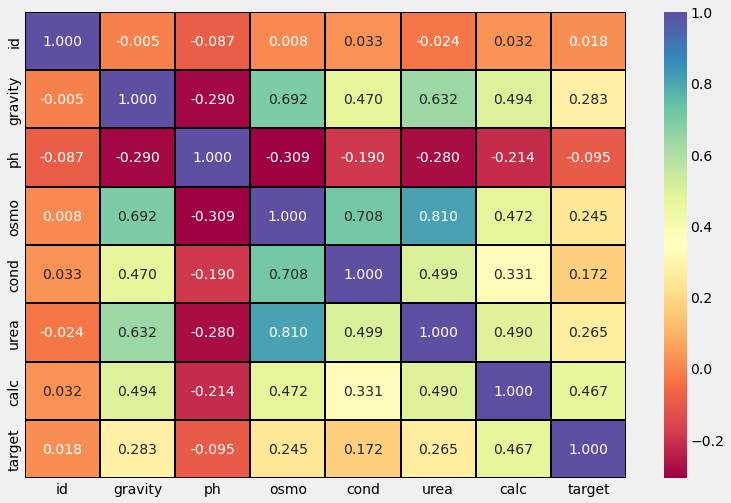

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



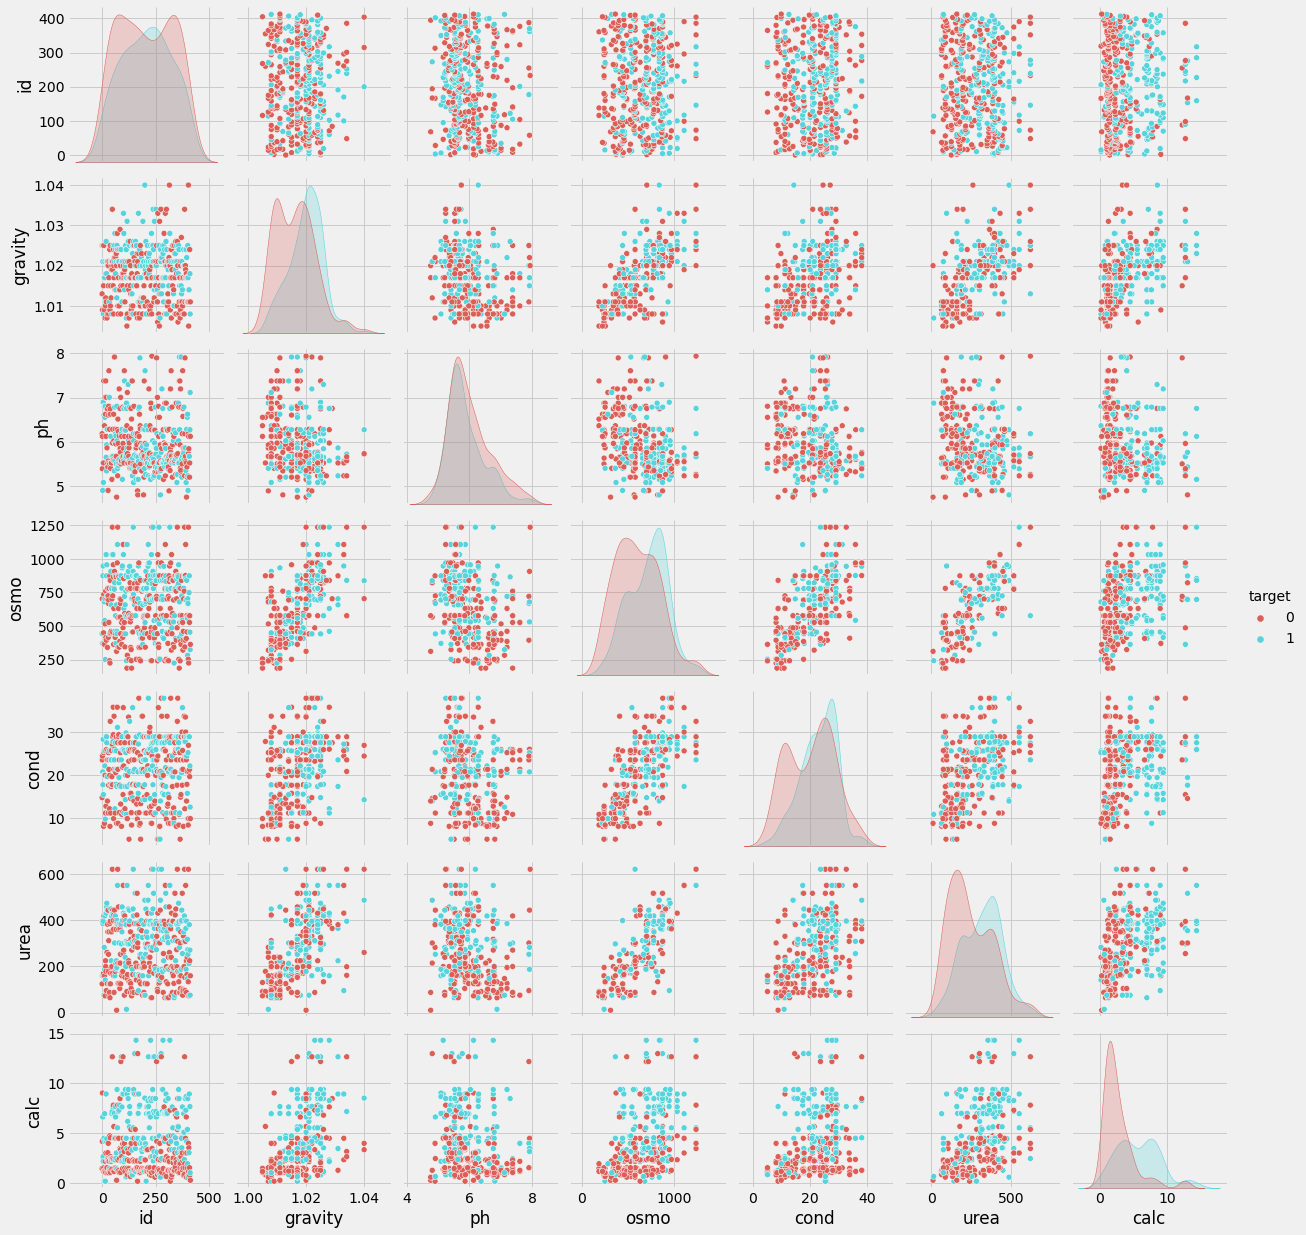

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



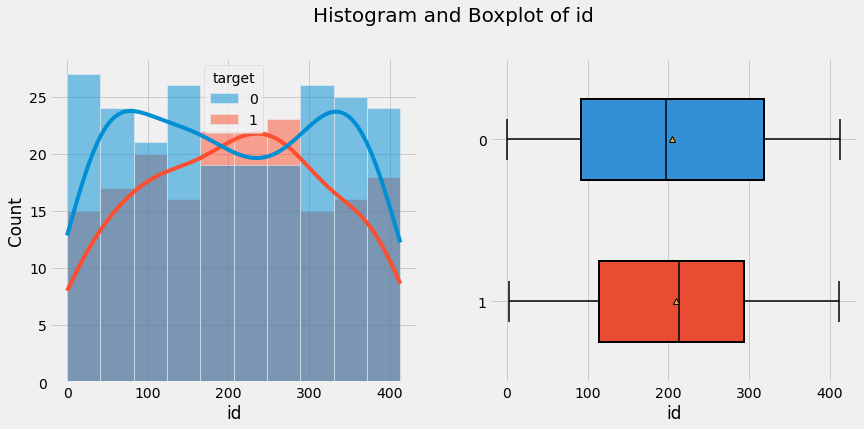

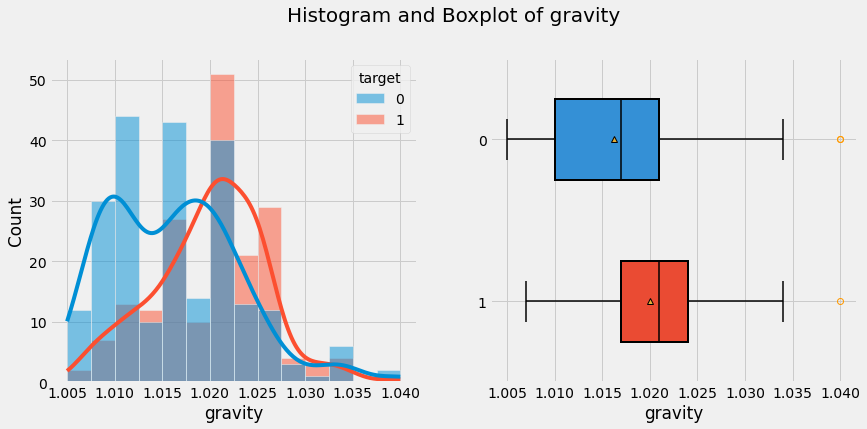

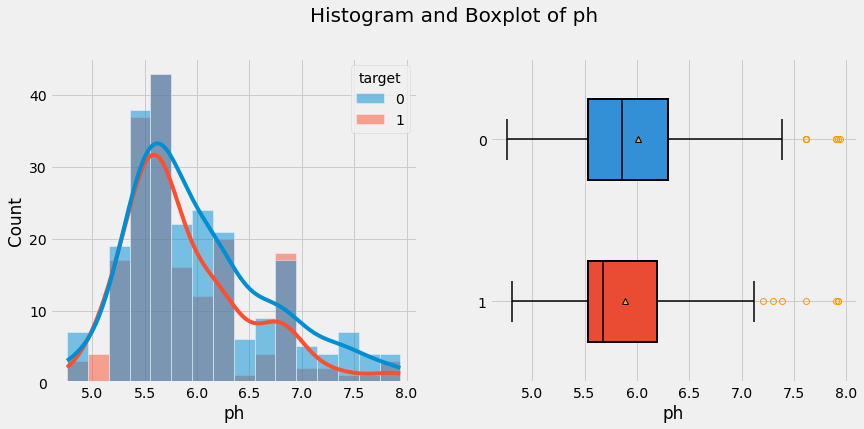

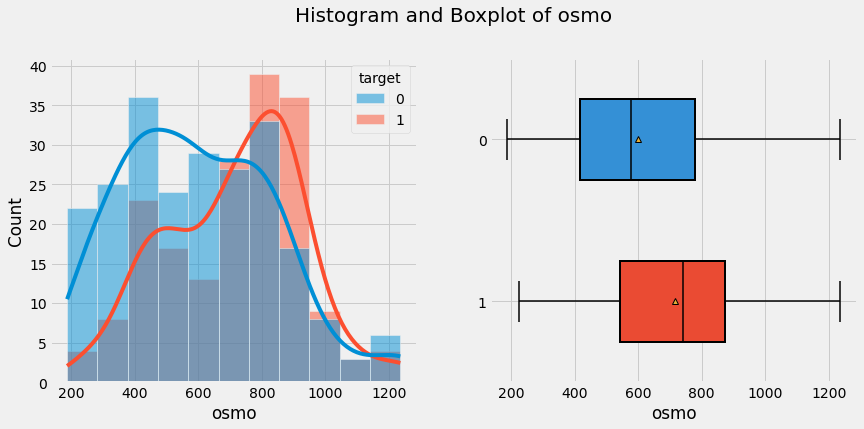

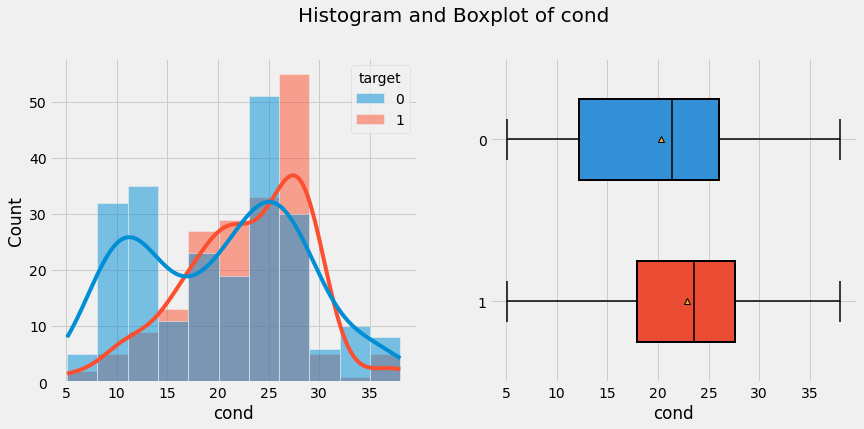

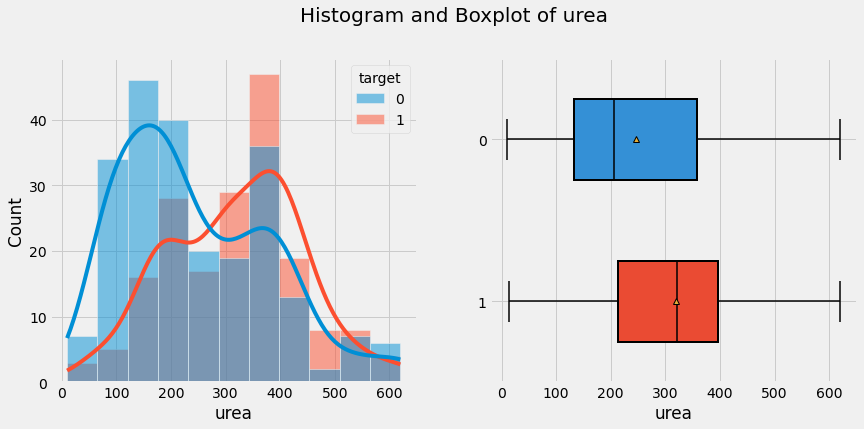

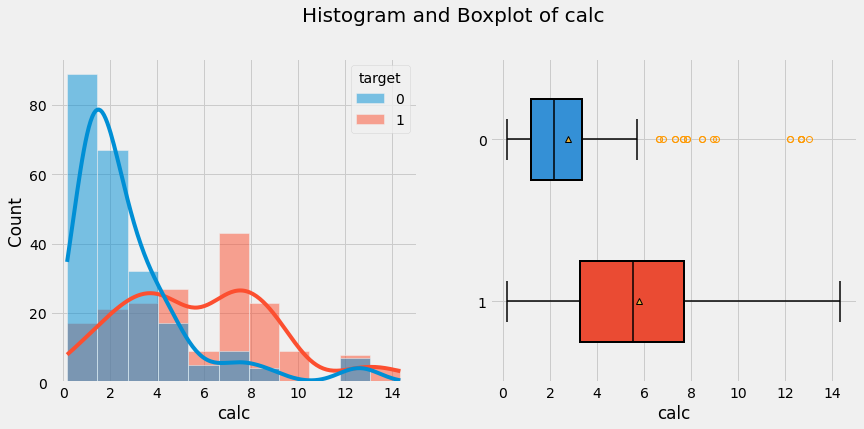

----------------------------------------------------------------------------------------------------
Countplot(s):



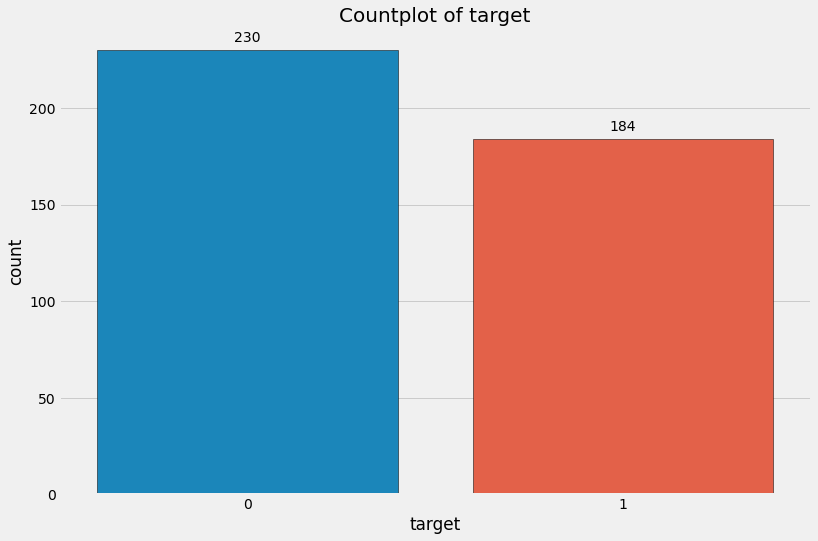

In [10]:
from fasteda import fast_eda
fast_eda(train_df, target = 'target')

In [18]:
print("Dataframe Info of test_data:")
test_df.info()

Dataframe Info of test_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


# Model Building & Training:

**Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.**

**There are two major types of supervised machine learning problems, called 1. Classification and 2. Regression**

### Our data set comes under classification problem. The supervised machine learning models which are considered to train the dataset in this Notebook are mentioned below:

1. Logistic Regression
2. k-Nearest Neighbors
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib

#### Creating Folders to store the model performance results -

In [204]:
from sklearn import metrics

ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
roc_auc_scores = []

# Function to call for storing the data

def store_results(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a,3))
    f1_score.append(round(b,3))
    recall.append(round(c,3))
    precision.append(round(d,3))
    roc_auc_scores.append(round(e,3))


def model_report(modelname, y_train, y_test, p_train, p_test):
    """ Here with this function we will specify the following:
    1. Computing the accuracy, f1 score, recall, precision, roc_auc_score of the model performance.
    2. Computing the classification report of the model
    3. Storing the result
    4. The below mentioned order of parameter passing is important
    """
    
    # printing the model name first
    print("Model:{}\n".format(modelname))
    
    # computing the accuracy of the model
    acc_train = metrics.accuracy_score(y_train, p_train) 
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on Training Data: {:.3f}".format(acc_train))
    print("Accuracy on Test Data: {:.3f}\n".format(acc_test))
    
    # computing the f1 score of the model
    f1_score_train = metrics.f1_score(y_train, p_train, average = 'micro')
    f1_score_test = metrics.f1_score(y_test, p_test, average = 'micro')
    print("f1_score on Training Data: {:.3f}".format(f1_score_train))
    print("f1_score on Test Data: {:.3f}".format(f1_score_test))
    
    # computing the recall of the model
    recall_train = metrics.recall_score(y_train, p_train, average = 'micro')
    recall_test = metrics.recall_score(y_test, p_test, average = 'micro')
    print("Recall on Training Data: {:.3f}".format(recall_train))
    print("Recall on Test Data: {:.3f}".format(recall_test))
    
    # computing the precision of the model
    precision_train = metrics.precision_score(y_train, p_train, average = 'micro')
    precision_test = metrics.precision_score(y_test, p_test, average = 'micro')
    print("Precision on Training Data: {:.3f}".format(precision_train))
    print("Precision on Test Data: {:.3f}".format(precision_test))
    
    # computing the roc_auc_score of the model
    roc_auc_score_model = metrics.roc_auc_score(y_test,p_test, average = 'micro')
    print("Roc_Auc_Score of this model is: {:.3f}".format(roc_auc_score_model))
    
    # printing the classification report of the models
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))
    
    #storing the results
    store_results(modelname, acc_test, f1_score_test, recall_test, precision_test, roc_auc_score_model)

In [13]:
X = train_df.drop(columns = ['id', 'target'], axis = 1)
y = train_df['target']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((331, 6), (331,), (83, 6), (83,))

## 1. Logistic Regression:

**Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.**

In [206]:
#Linear Regression Model
from sklearn.linear_model import LogisticRegression

#Instantiate the model
log = LogisticRegression()

#Fit the model
log.fit(X_train, y_train)

LogisticRegression()

In [207]:
# Predict the target value from the moel for the samples
p_train_log = log.predict(X_train)
p_test_log = log.predict(X_test)

In [208]:
model_report(str(log), y_train, y_test, p_train_log, p_test_log)

Model:LogisticRegression()

Accuracy on Training Data: 0.719
Accuracy on Test Data: 0.783

f1_score on Training Data: 0.719
f1_score on Test Data: 0.783
Recall on Training Data: 0.719
Recall on Test Data: 0.783
Precision on Training Data: 0.719
Precision on Test Data: 0.783
Roc_Auc_Score of this model is: 0.775
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        45
           1       0.81      0.68      0.74        38

    accuracy                           0.78        83
   macro avg       0.79      0.78      0.78        83
weighted avg       0.79      0.78      0.78        83



### ROC Curve Plotting for Logistic Regression Model:

In [61]:
false_positive_rate_log, true_positive_rate_log, threshold_log = roc_curve(y_test, p_test_log)

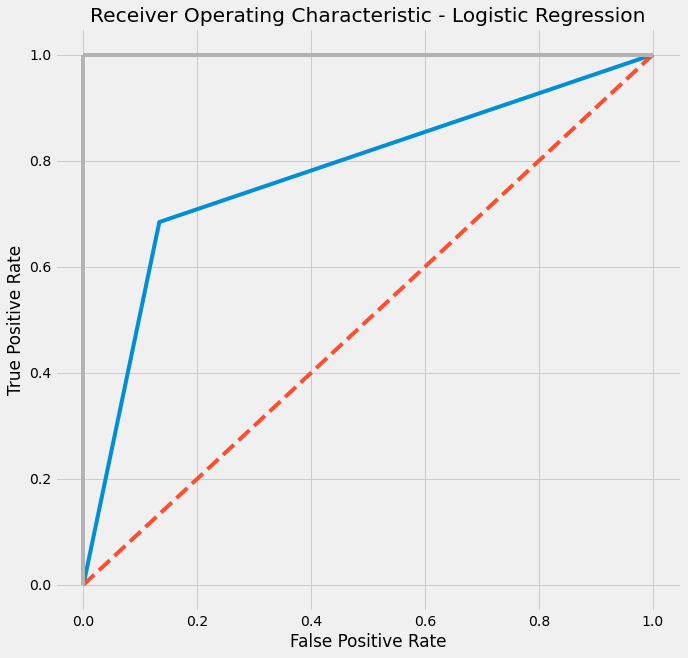

In [62]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_log, true_positive_rate_log)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K_Nearest_Neighbors Classifier Model:

**K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. KNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.**

In [63]:
#K Nearest Neighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier

#Instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
# Predict the target value from the model for the samples
p_train_knn = knn.predict(X_train)
p_test_knn = knn.predict(X_test)

In [126]:
model_report(str(knn), y_train, y_test, p_train_knn, p_test_knn)

Model:KNeighborsClassifier(n_neighbors=1)

Accuracy on Training Data: 1.000
Accuracy on Test Data: 0.590

f1_score on Training Data: 1.000
f1_score on Test Data: 0.590
Recall on Training Data: 1.000
Recall on Test Data: 0.590
Precision on Training Data: 1.000
Precision on Test Data: 0.590
Roc_Auc_Score of this model is: 0.589
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.60      0.61        45
           1       0.55      0.58      0.56        38

    accuracy                           0.59        83
   macro avg       0.59      0.59      0.59        83
weighted avg       0.59      0.59      0.59        83



**Let's perform the KNN classification algorithm with different values of n_neighbors to evaluate the training and testing accuracies**

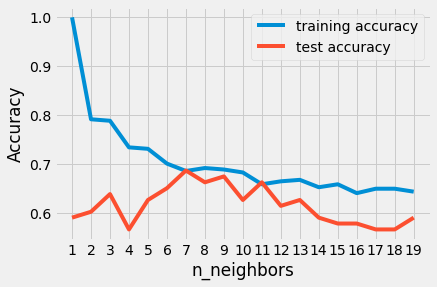

In [223]:
knn_training_accuracy = []
knn_test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn1 = KNeighborsClassifier(n_neighbors=n)

    knn1.fit(X_train, y_train)
    # record training set accuracy
    knn_training_accuracy.append(knn1.score(X_train, y_train))
    # record generalization accuracy
    knn_test_accuracy.append(knn1.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, knn_training_accuracy, label="training accuracy")
plt.plot(depth, knn_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()
plt.xticks(range(1,20,1));

**From this graph, we can check whether this model is overfitting or underfitting to the data. At n_neighbors = 7, the test accuracy is the highest and the training accuracy collides with it. This convergence implies that the model has found a balance between complexity and generalization. The model is not overfitted there, it is capturing the underlying patterns. And this point represents the optimal number of neighbors**

### ROC Curve Plotting for K Nearest Neighbors Model:

In [68]:
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test, p_test_knn)

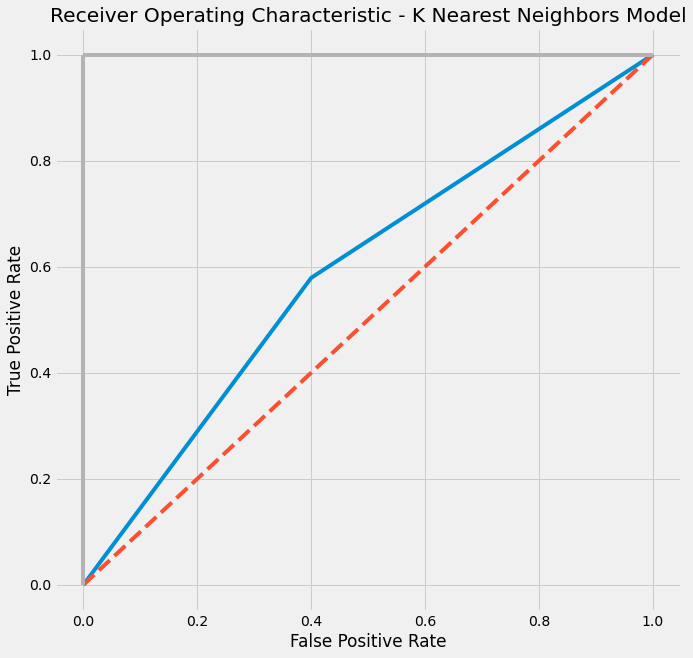

In [69]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K Nearest Neighbors Model')
plt.plot(false_positive_rate_knn, true_positive_rate_knn)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. Support Vector Machine Classifier:

**Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.**

In [70]:
#Support Vector Machine Classifier Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

svc = GridSearchCV(SVC(), param_grid)

#Fit the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [71]:
# Predict the target value from the model for the samples
p_train_svc = svc.predict(X_train)
p_test_svc = svc.predict(X_test)

In [127]:
model_report(str(svc), y_train, y_test, p_train_svc, p_test_svc)

Model:GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

Accuracy on Training Data: 0.864
Accuracy on Test Data: 0.590

f1_score on Training Data: 0.864
f1_score on Test Data: 0.590
Recall on Training Data: 0.864
Recall on Test Data: 0.590
Precision on Training Data: 0.864
Precision on Test Data: 0.590
Roc_Auc_Score of this model is: 0.587
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        45
           1       0.55      0.55      0.55        38

    accuracy                           0.59        83
   macro avg       0.59      0.59      0.59        83
weighted avg       0.59      0.59      0.59        83



### ROC Curve Plotting for Support Vector Machine Classifier Model:

In [74]:
false_positive_rate_svc, true_positive_rate_svc, threshold_svc = roc_curve(y_test, p_test_svc)

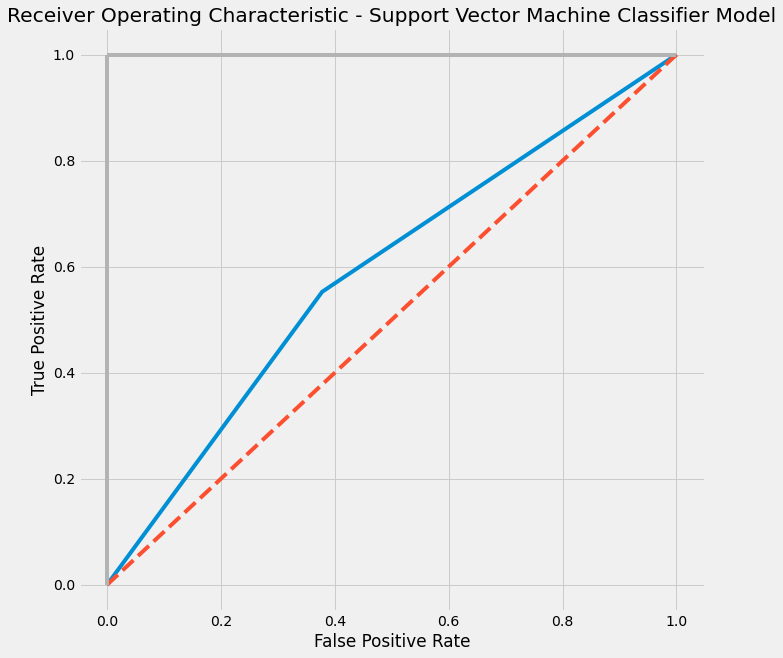

In [75]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Support Vector Machine Classifier Model')
plt.plot(false_positive_rate_svc, true_positive_rate_svc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. Naive Bayes Classifier Model: 

**Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.**

In [76]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [77]:
#predicting the target value from the model for the samples
p_train_nb = nb.predict(X_train)
p_test_nb = nb.predict(X_test)

In [128]:
model_report(str(nb),y_train,y_test,p_train_nb,p_test_nb)

Model:GaussianNB()

Accuracy on Training Data: 0.659
Accuracy on Test Data: 0.783

f1_score on Training Data: 0.659
f1_score on Test Data: 0.783
Recall on Training Data: 0.659
Recall on Test Data: 0.783
Precision on Training Data: 0.659
Precision on Test Data: 0.783
Roc_Auc_Score of this model is: 0.782
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.76      0.76      0.76        38

    accuracy                           0.78        83
   macro avg       0.78      0.78      0.78        83
weighted avg       0.78      0.78      0.78        83



### ROC Curve Plotting for Naive Bayes Classifier Model:

In [80]:
false_positive_rate_nb, true_positive_rate_nb, threshold_nb = roc_curve(y_test, p_test_nb)

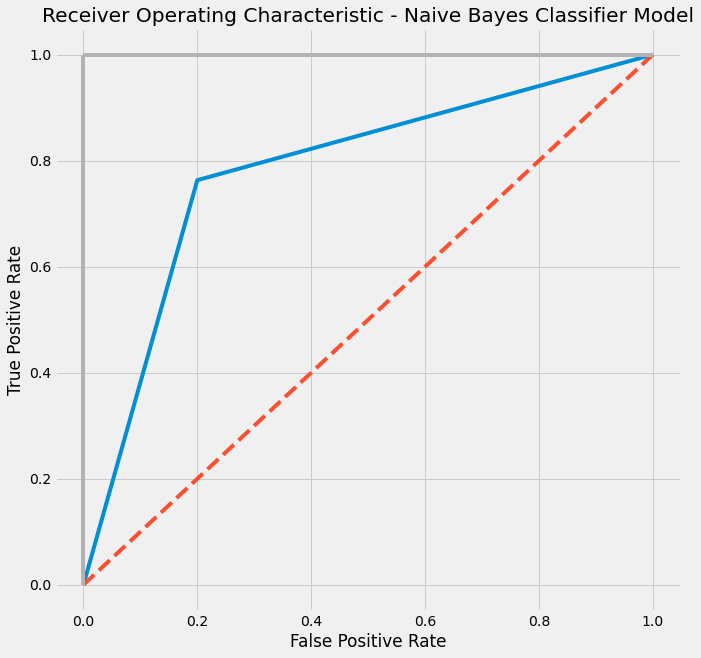

In [81]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes Classifier Model')
plt.plot(false_positive_rate_nb, true_positive_rate_nb)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Decision Trees Classifier:
**Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.**

In [82]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [83]:
#predicting the target value from the model for the samples

p_train_tree = tree.predict(X_train)
p_test_tree = tree.predict(X_test)

In [129]:
model_report(str(tree),y_train,y_test,p_train_nb,p_test_tree)

Model:DecisionTreeClassifier(max_depth=30)

Accuracy on Training Data: 0.659
Accuracy on Test Data: 0.651

f1_score on Training Data: 0.659
f1_score on Test Data: 0.651
Recall on Training Data: 0.659
Recall on Test Data: 0.651
Precision on Training Data: 0.659
Precision on Test Data: 0.651
Roc_Auc_Score of this model is: 0.645
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        45
           1       0.63      0.58      0.60        38

    accuracy                           0.65        83
   macro avg       0.65      0.65      0.65        83
weighted avg       0.65      0.65      0.65        83



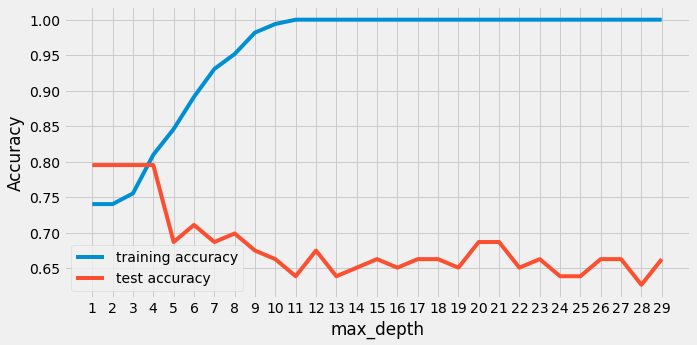

In [225]:
tree_training_accuracy = []
tree_test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    tree_training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    tree_test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.figure(figsize= (10,5))
plt.plot(depth, tree_training_accuracy, label="training accuracy")
plt.plot(depth, tree_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()
plt.xticks(range(1,30,1))
plt.show();

**Here near max_depth = 4, we are having the highest test accuracy and the training accuracy converge with it, implying the optimal number of max_depth for this Decision Tree Model**

### ROC Curve Plotting for Decision Tree Classifier Model:

In [86]:
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, p_test_tree)

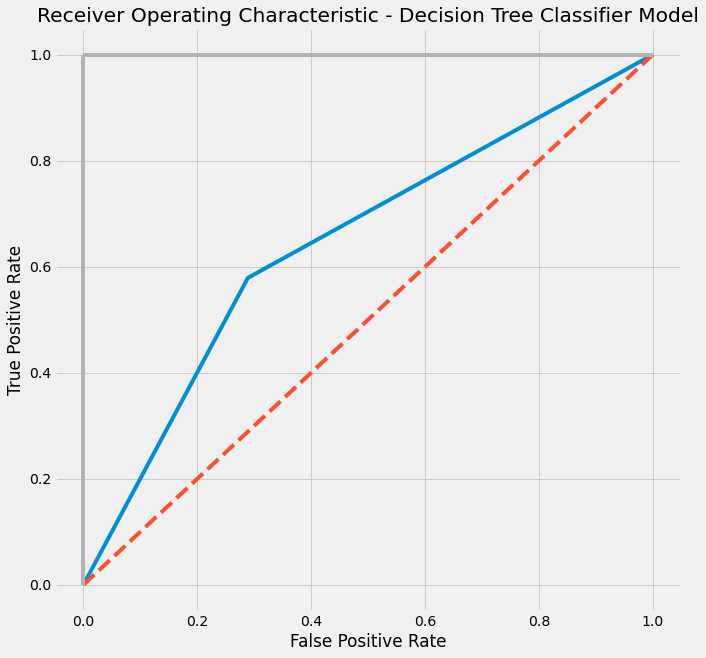

In [87]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier Model')
plt.plot(false_positive_rate_tree, true_positive_rate_tree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6. Random Forest Classifier: 

**Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.**

In [89]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [90]:
#predicting the target value from the model for the samples
p_train_forest = forest.predict(X_train)
p_test_forest = forest.predict(X_test)

In [130]:
model_report(str(forest),y_train,y_test,p_train_nb,p_test_forest)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on Training Data: 0.659
Accuracy on Test Data: 0.747

f1_score on Training Data: 0.659
f1_score on Test Data: 0.747
Recall on Training Data: 0.659
Recall on Test Data: 0.747
Precision on Training Data: 0.659
Precision on Test Data: 0.747
Roc_Auc_Score of this model is: 0.742
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        45
           1       0.74      0.68      0.71        38

    accuracy                           0.75        83
   macro avg       0.75      0.74      0.74        83
weighted avg       0.75      0.75      0.75        83



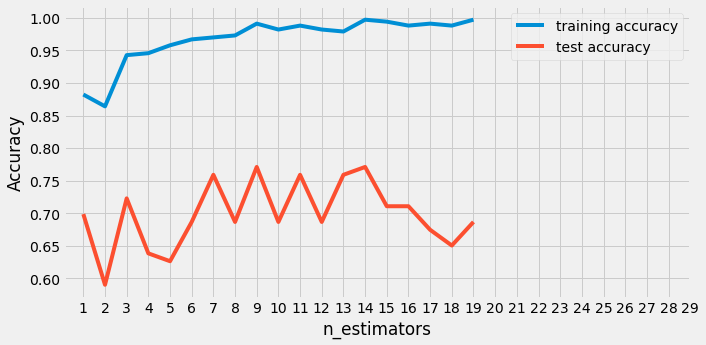

In [227]:
forest_training_accuracy = []
forest_test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    forest_training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    forest_test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=(10,5))
plt.plot(depth, forest_training_accuracy, label="training accuracy")
plt.plot(depth, forest_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()
plt.xticks(range(1,30,1));

**Here the training accuracy is significantly higher than the test accuracy, it implies overfitting to the training data**

### ROC Curve Plotting for Random Forest Classifier Model:

In [94]:
false_positive_rate_forest, true_positive_rate_forest, threshold_forest = roc_curve(y_test, p_test_forest)

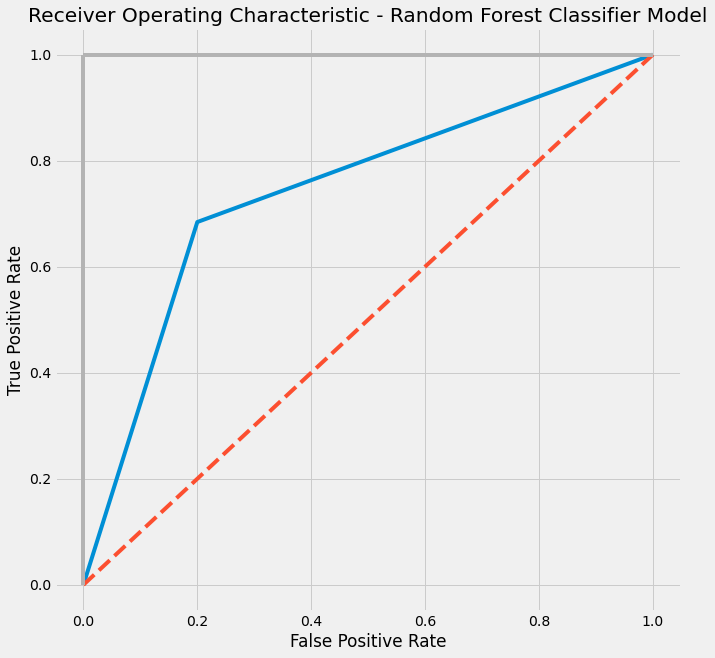

In [95]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest Classifier Model')
plt.plot(false_positive_rate_forest, true_positive_rate_forest)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 7. Gradient Boosting Classifier:

**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off. Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.**

In [96]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [97]:
#predicting the target value from the model for the samples
p_train_gbc = gbc.predict(X_train)
p_test_gbc = gbc.predict(X_test)

In [131]:
model_report(str(gbc),y_train,y_test,p_train_nb,p_test_gbc)

Model:GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

Accuracy on Training Data: 0.659
Accuracy on Test Data: 0.687

f1_score on Training Data: 0.659
f1_score on Test Data: 0.687
Recall on Training Data: 0.659
Recall on Test Data: 0.687
Precision on Training Data: 0.659
Precision on Test Data: 0.687
Roc_Auc_Score of this model is: 0.685
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        45
           1       0.66      0.66      0.66        38

    accuracy                           0.69        83
   macro avg       0.68      0.68      0.68        83
weighted avg       0.69      0.69      0.69        83



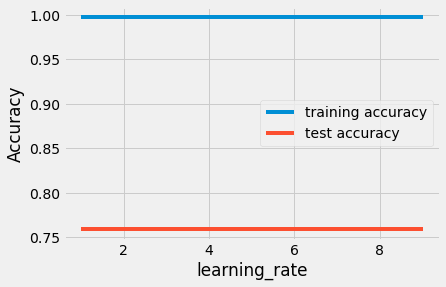

In [99]:
gbc_training_accuracy = []
gbc_test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    gbc_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    gbc_test.fit(X_train, y_train)
    # record training set accuracy
    gbc_training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    gbc_test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, gbc_training_accuracy, label="training accuracy")
plt.plot(depth, gbc_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

### ROC Curve Plotting for Gradient Boosting Classifier Model:

In [101]:
false_positive_rate_gbc, true_positive_rate_gbc, threshold_gbc = roc_curve(y_test, p_test_gbc)

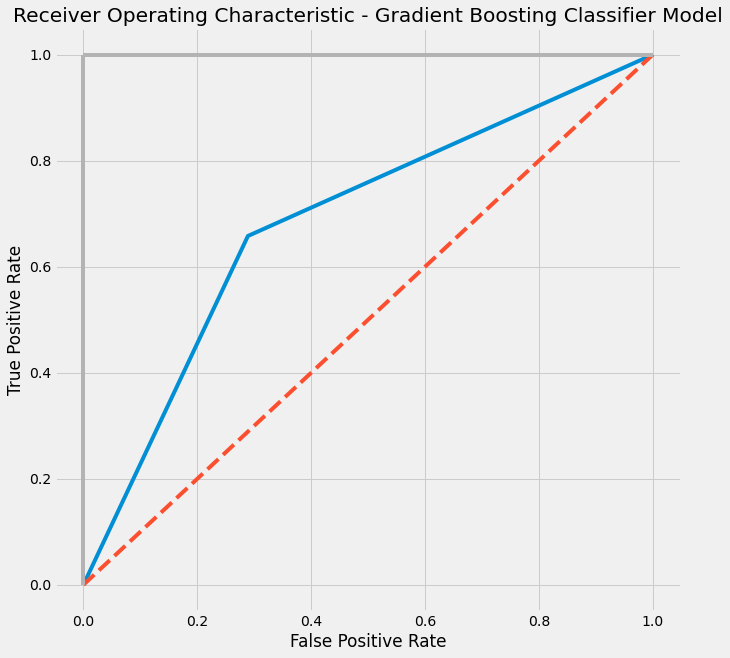

In [102]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient Boosting Classifier Model')
plt.plot(false_positive_rate_gbc, true_positive_rate_gbc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8. CatBoost Classifier:

**CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.**

In [103]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.6610370	total: 138ms	remaining: 2m 18s
1:	learn: 0.6339403	total: 142ms	remaining: 1m 11s
2:	learn: 0.6119820	total: 146ms	remaining: 48.6s
3:	learn: 0.5904008	total: 149ms	remaining: 37.1s
4:	learn: 0.5729431	total: 151ms	remaining: 30s
5:	learn: 0.5593020	total: 153ms	remaining: 25.3s
6:	learn: 0.5413474	total: 155ms	remaining: 21.9s
7:	learn: 0.5295969	total: 158ms	remaining: 19.6s
8:	learn: 0.5237543	total: 161ms	remaining: 17.8s
9:	learn: 0.5146066	total: 163ms	remaining: 16.2s
10:	learn: 0.5018740	total: 165ms	remaining: 14.9s
11:	learn: 0.4906118	total: 167ms	remaining: 13.8s
12:	learn: 0.4841496	total: 169ms	remaining: 12.8s
13:	learn: 0.4768036	total: 171ms	remaining: 12.1s
14:	learn: 0.4714833	total: 173ms	remaining: 11.4s
15:	learn: 0.4654258	total: 175ms	remaining: 10.8s
16:	learn: 0.4535737	total: 177ms	remaining: 10.2s
17:	learn: 0.4477589	total: 179ms	remaining: 9.77s
18:	learn: 0.4446181	total: 181ms	remaining: 9.33s
19:	learn: 0.4423990	total: 183ms	remaini

213:	learn: 0.0693197	total: 628ms	remaining: 2.3s
214:	learn: 0.0688105	total: 635ms	remaining: 2.32s
215:	learn: 0.0687423	total: 638ms	remaining: 2.31s
216:	learn: 0.0685899	total: 642ms	remaining: 2.32s
217:	learn: 0.0683677	total: 651ms	remaining: 2.33s
218:	learn: 0.0676493	total: 653ms	remaining: 2.33s
219:	learn: 0.0671093	total: 657ms	remaining: 2.33s
220:	learn: 0.0664275	total: 664ms	remaining: 2.34s
221:	learn: 0.0660749	total: 669ms	remaining: 2.35s
222:	learn: 0.0654484	total: 673ms	remaining: 2.34s
223:	learn: 0.0652146	total: 683ms	remaining: 2.37s
224:	learn: 0.0643741	total: 685ms	remaining: 2.36s
225:	learn: 0.0642981	total: 688ms	remaining: 2.36s
226:	learn: 0.0638015	total: 694ms	remaining: 2.36s
227:	learn: 0.0630717	total: 696ms	remaining: 2.36s
228:	learn: 0.0629738	total: 699ms	remaining: 2.35s
229:	learn: 0.0623839	total: 702ms	remaining: 2.35s
230:	learn: 0.0617272	total: 708ms	remaining: 2.36s
231:	learn: 0.0610669	total: 711ms	remaining: 2.35s
232:	learn: 0

435:	learn: 0.0233181	total: 1.27s	remaining: 1.65s
436:	learn: 0.0231968	total: 1.28s	remaining: 1.65s
437:	learn: 0.0230677	total: 1.28s	remaining: 1.65s
438:	learn: 0.0230406	total: 1.29s	remaining: 1.65s
439:	learn: 0.0229198	total: 1.29s	remaining: 1.64s
440:	learn: 0.0227981	total: 1.3s	remaining: 1.64s
441:	learn: 0.0227808	total: 1.3s	remaining: 1.64s
442:	learn: 0.0227250	total: 1.3s	remaining: 1.64s
443:	learn: 0.0226751	total: 1.3s	remaining: 1.63s
444:	learn: 0.0225945	total: 1.31s	remaining: 1.63s
445:	learn: 0.0225622	total: 1.31s	remaining: 1.63s
446:	learn: 0.0225433	total: 1.31s	remaining: 1.63s
447:	learn: 0.0225009	total: 1.32s	remaining: 1.62s
448:	learn: 0.0223772	total: 1.32s	remaining: 1.62s
449:	learn: 0.0223390	total: 1.32s	remaining: 1.62s
450:	learn: 0.0221809	total: 1.33s	remaining: 1.62s
451:	learn: 0.0221386	total: 1.33s	remaining: 1.61s
452:	learn: 0.0220952	total: 1.33s	remaining: 1.61s
453:	learn: 0.0220774	total: 1.34s	remaining: 1.61s
454:	learn: 0.02

628:	learn: 0.0141575	total: 1.92s	remaining: 1.13s
629:	learn: 0.0141338	total: 1.92s	remaining: 1.13s
630:	learn: 0.0140934	total: 1.93s	remaining: 1.13s
631:	learn: 0.0140326	total: 1.93s	remaining: 1.12s
632:	learn: 0.0140154	total: 1.93s	remaining: 1.12s
633:	learn: 0.0139438	total: 1.94s	remaining: 1.12s
634:	learn: 0.0139206	total: 1.94s	remaining: 1.11s
635:	learn: 0.0138350	total: 1.94s	remaining: 1.11s
636:	learn: 0.0137821	total: 1.94s	remaining: 1.11s
637:	learn: 0.0137733	total: 1.94s	remaining: 1.1s
638:	learn: 0.0137620	total: 1.95s	remaining: 1.1s
639:	learn: 0.0137260	total: 1.95s	remaining: 1.1s
640:	learn: 0.0136765	total: 1.95s	remaining: 1.09s
641:	learn: 0.0136294	total: 1.95s	remaining: 1.09s
642:	learn: 0.0136143	total: 1.96s	remaining: 1.09s
643:	learn: 0.0135500	total: 1.96s	remaining: 1.08s
644:	learn: 0.0134893	total: 1.96s	remaining: 1.08s
645:	learn: 0.0134563	total: 1.96s	remaining: 1.07s
646:	learn: 0.0134452	total: 1.96s	remaining: 1.07s
647:	learn: 0.0

822:	learn: 0.0096061	total: 2.4s	remaining: 516ms
823:	learn: 0.0095937	total: 2.4s	remaining: 513ms
824:	learn: 0.0095789	total: 2.4s	remaining: 510ms
825:	learn: 0.0095628	total: 2.41s	remaining: 508ms
826:	learn: 0.0095474	total: 2.42s	remaining: 506ms
827:	learn: 0.0095195	total: 2.42s	remaining: 503ms
828:	learn: 0.0095006	total: 2.42s	remaining: 500ms
829:	learn: 0.0094917	total: 2.43s	remaining: 498ms
830:	learn: 0.0094831	total: 2.43s	remaining: 495ms
831:	learn: 0.0094832	total: 2.44s	remaining: 492ms
832:	learn: 0.0094598	total: 2.44s	remaining: 489ms
833:	learn: 0.0094567	total: 2.44s	remaining: 486ms
834:	learn: 0.0094354	total: 2.45s	remaining: 484ms
835:	learn: 0.0093994	total: 2.45s	remaining: 482ms
836:	learn: 0.0093773	total: 2.46s	remaining: 479ms
837:	learn: 0.0093743	total: 2.46s	remaining: 476ms
838:	learn: 0.0093525	total: 2.46s	remaining: 473ms
839:	learn: 0.0093468	total: 2.47s	remaining: 471ms
840:	learn: 0.0093265	total: 2.48s	remaining: 468ms
841:	learn: 0.0

In [104]:
#predicting the target value from the model for the samples
p_train_cat = cat.predict(X_train)
p_test_cat = cat.predict(X_test)

In [132]:
model_report(str(cat),y_train,y_test,p_train_cat,p_test_cat)

Model:<catboost.core.CatBoostClassifier object at 0x000001AF1D5C6070>

Accuracy on Training Data: 1.000
Accuracy on Test Data: 0.699

f1_score on Training Data: 1.000
f1_score on Test Data: 0.699
Recall on Training Data: 1.000
Recall on Test Data: 0.699
Precision on Training Data: 1.000
Precision on Test Data: 0.699
Roc_Auc_Score of this model is: 0.692
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        45
           1       0.70      0.61      0.65        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.70        83



### ROC Curve Plotting for CatBoost Classifier Model:

In [107]:
false_positive_rate_cat, true_positive_rate_cat, threshold_cat = roc_curve(y_test, p_test_cat)

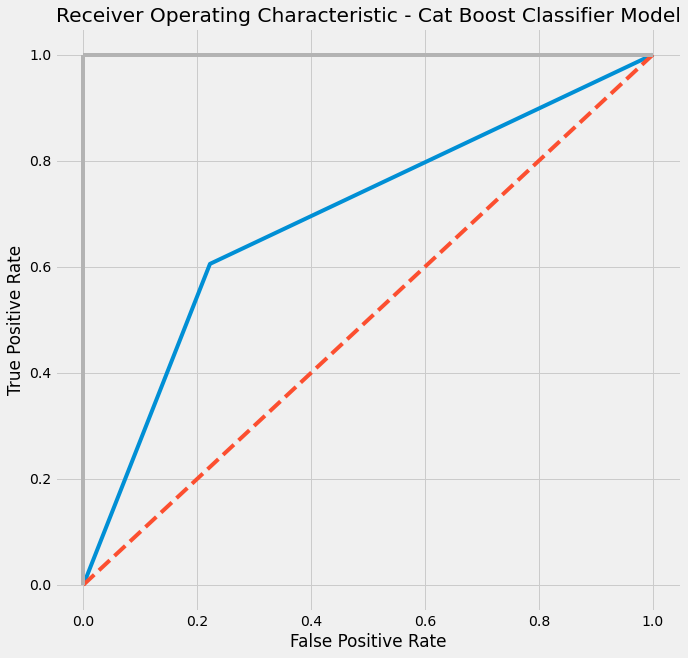

In [108]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Cat Boost Classifier Model')
plt.plot(false_positive_rate_cat, true_positive_rate_cat)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 9. XGBoost Classifier:

**XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python**

In [109]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [110]:
#predicting the target value from the model for the samples
p_train_xgb = xgb.predict(X_train)
p_test_xgb = xgb.predict(X_test)

In [133]:
model_report(str(xgb),y_train,y_test,p_train_xgb,p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy on Training Data: 1.000
Accuracy on Test Data: 0.663

f1_score on Training Data: 1.000
f1_score on Test Data: 0.663
Recall on Training Data: 1.000
Recall on Test Data: 0.663
Precision on Training Data: 1.000
Precision on Test Data: 

### ROC Curve Plotting for XgBoost Classifier Model:

In [113]:
false_positive_rate_xgb, true_positive_rate_xgb, threshold_xgb = roc_curve(y_test, p_test_xgb)

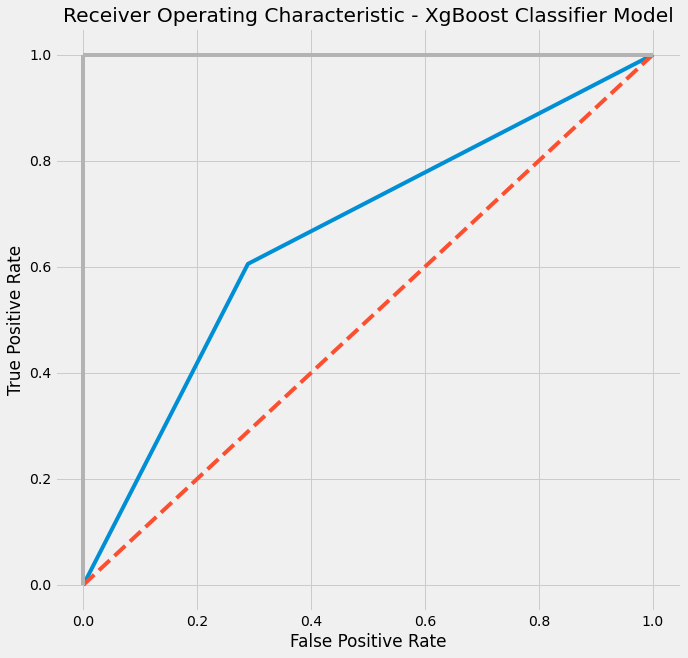

In [114]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XgBoost Classifier Model')
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 10. Multi-layer Perceptron Classifier:

**MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.**

In [115]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [116]:
#predicting the target value from the model for the samples
p_train_mlp = mlp.predict(X_train)
p_test_mlp = mlp.predict(X_test)

In [134]:
model_report(str(mlp),y_train,y_test,p_train_mlp,p_test_mlp)

Model:MLPClassifier()

Accuracy on Training Data: 0.713
Accuracy on Test Data: 0.819

f1_score on Training Data: 0.713
f1_score on Test Data: 0.819
Recall on Training Data: 0.713
Recall on Test Data: 0.819
Precision on Training Data: 0.713
Precision on Test Data: 0.819
Roc_Auc_Score of this model is: 0.815
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        45
           1       0.83      0.76      0.79        38

    accuracy                           0.82        83
   macro avg       0.82      0.81      0.82        83
weighted avg       0.82      0.82      0.82        83



### ROC Curve Plotting for Multilayer Perceptron Classifier Model:

In [119]:
false_positive_rate_mlp, true_positive_rate_mlp, threshold_mlp = roc_curve(y_test, p_test_mlp)

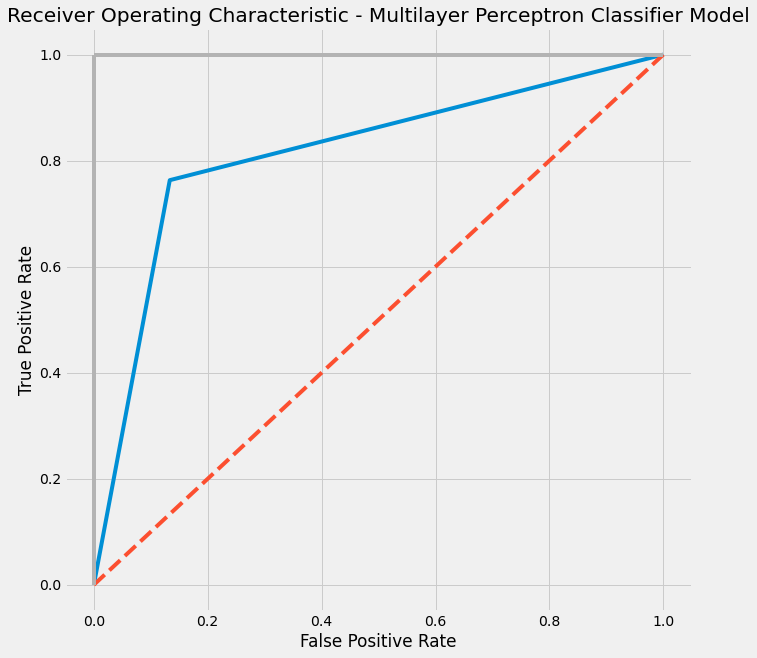

In [120]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Multilayer Perceptron Classifier Model')
plt.plot(false_positive_rate_mlp, true_positive_rate_mlp)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparison of Models:

**To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.**

In [136]:
#Creating a Dataframe

result = pd.DataFrame({'Ml Model': ML_Model,
                       'ROC_AUC_Score': roc_auc_score,
                      'Accuracy': accuracy,
                      'F1_score': f1_score,
                      'Recall': recall,
                      'Precision': precision,
                      })

sorted_result = result.sort_values(by=['ROC_AUC_Score', 'Accuracy', 'F1_score'], ascending = False).reset_index(drop=True)
sorted_result

,Ml Model,ROC_AUC_Score,Accuracy,F1_score,Recall,Precision
0,MLPClassifier(),0.815,0.819,0.819,0.819,0.819
1,GaussianNB(),0.782,0.783,0.783,0.783,0.783
2,LogisticRegression(),0.775,0.783,0.783,0.783,0.783
3,RandomForestClassifier(n_estimators=10),0.742,0.747,0.747,0.747,0.747
4,<catboost.core.CatBoostClassifier object at 0x...,0.692,0.699,0.699,0.699,0.699
5,"GradientBoostingClassifier(learning_rate=0.7, ...",0.685,0.687,0.687,0.687,0.687
6,"XGBClassifier(base_score=None, booster=None, c...",0.658,0.663,0.663,0.663,0.663
7,DecisionTreeClassifier(max_depth=30),0.645,0.651,0.651,0.651,0.651
8,KNeighborsClassifier(n_neighbors=1),0.589,0.590,0.590,0.590,0.590
9,"GridSearchCV(estimator=SVC(),\n pa...",0.587,0.590,0.590,0.590,0.590


# Predicting model on Test Data:

In [139]:
len(test_df)

276

In [140]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [141]:
y_pred_test_data = mlp.predict(test_df.drop(['id'], axis = 1))
y_pred_test_data

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [143]:
y_pred_test_data_proba = mlp.predict_proba(test_df.drop(['id'], axis = 1))
y_pred_test_data_proba

array([[0.60783151, 0.39216849],
       [0.47511562, 0.52488438],
       [0.06400306, 0.93599694],
       [0.49039573, 0.50960427],
       [0.76061458, 0.23938542],
       [0.4338033 , 0.5661967 ],
       [0.4217643 , 0.5782357 ],
       [0.08662103, 0.91337897],
       [0.69082361, 0.30917639],
       [0.67805619, 0.32194381],
       [0.64790864, 0.35209136],
       [0.69904539, 0.30095461],
       [0.14549444, 0.85450556],
       [0.50310987, 0.49689013],
       [0.67634351, 0.32365649],
       [0.56966031, 0.43033969],
       [0.09800645, 0.90199355],
       [0.58503247, 0.41496753],
       [0.53355846, 0.46644154],
       [0.64873513, 0.35126487],
       [0.61257591, 0.38742409],
       [0.58700013, 0.41299987],
       [0.5608413 , 0.4391587 ],
       [0.25202292, 0.74797708],
       [0.20551776, 0.79448224],
       [0.81157897, 0.18842103],
       [0.60555794, 0.39444206],
       [0.6207722 , 0.3792278 ],
       [0.55281787, 0.44718213],
       [0.1637573 , 0.8362427 ],
       [0.

In [144]:
y_pred_test_data_frame = pd.DataFrame(y_pred_test_data, columns = ['target'])

y_pred_test_data_frame_proba = pd.DataFrame(y_pred_test_data_proba, columns = ['target_0', 'target_1'])

In [145]:
submission_df = pd.concat([test_df, y_pred_test_data_frame,y_pred_test_data_frame_proba], axis=1)
submission_df

,id,gravity,ph,osmo,cond,urea,calc,target,target_0,target_1
0,414,1.017,5.24,345,11.5,152,1.16,0,0.607832,0.392168
1,415,1.020,5.68,874,29.0,385,3.46,1,0.475116,0.524884
2,416,1.024,5.36,698,19.5,354,13.00,1,0.064003,0.935997
3,417,1.020,5.33,668,25.3,252,3.46,1,0.490396,0.509604
4,418,1.011,5.87,567,29.0,457,2.36,0,0.760615,0.239385
...,...,...,...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31,1,0.186928,0.813072
272,686,1.012,5.62,410,14.0,195,1.45,0,0.621611,0.378389
273,687,1.031,5.68,874,29.0,380,4.49,1,0.393594,0.606406
274,688,1.019,5.47,543,21.4,170,1.64,0,0.622325,0.377675


In [146]:
submission_df[['id','target']].to_csv('submission.csv',index=False)